In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
slurm_ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log',
                       delimiter = ' - ',
                       header = None,
                       engine = 'python')

slurm_ce5.head()

,0,1,2,3,4,5
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [3]:
slurm_ce5 = slurm_ce5.rename(columns = {
    0: 'time',
    1: 'user',
    2: 'retry',
    3: 'elapsed_time',
    4: 'return_code',
    5: 'command'
})

In [4]:
slurm_ce5['user'] = slurm_ce5['user'].str.slice(start = 5)
slurm_ce5['retry'] = slurm_ce5['retry'].str.slice(start = 6)
slurm_ce5['elapsed_time'] = slurm_ce5['elapsed_time'].str.slice(start = 5)
slurm_ce5['return_code'] = slurm_ce5['return_code'].str.slice(start = 11)
slurm_ce5['command'] = slurm_ce5['command'].str.extract(r'\/bin\/(\w+)')

slurm_ce5['time'] = pd.to_datetime(slurm_ce5['time'],
                                   infer_datetime_format = True,
                                   errors = 'coerce')

slurm_ce5.head()

,time,user,retry,elapsed_time,return_code,command
0,2020-10-16 08:15:39.278699,0,0,0.07347559928894043,0,sacct
1,2020-10-16 08:18:08.313309,0,0,0.18363237380981445,0,sacct
2,2020-10-16 08:22:48.128689,0,0,0.07547116279602051,0,sacct
3,2020-10-16 08:25:13.257408,0,0,0.09484362602233887,0,sacct
4,2020-10-16 08:31:01.460723,0,0,0.07498788833618164,0,sacct


In [8]:
slurm_ce5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770893 entries, 0 to 4770892
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   time          datetime64[ns]
 1   user          object        
 2   retry         object        
 3   elapsed_time  object        
 4   return_code   object        
 5   command       object        
dtypes: datetime64[ns](1), object(5)
memory usage: 218.4+ MB


In [6]:
slurm_ce5.to_csv('../data/slurm_ce5_clean.csv',
                index = False)

In [9]:
slurm_ce6 = pd.read_csv('../data/slurm_wrapper_ce6.log',
                       delimiter = ' - ',
                       header = None,
                       engine = 'python')

slurm_ce6.head()

,0,1,2,3,4,5
0,2020-10-16 10:37:44.163454,user 9202,retry 0,time 0.08495402336120605,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,2020-10-16 10:37:44.206654,user 9202,retry 0,time 0.08943057060241699,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2,2020-10-16 10:37:44.218760,user 9202,retry 0,time 0.05928945541381836,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
3,2020-10-16 10:37:44.256403,user 9202,retry 0,time 0.038695573806762695,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
4,2020-10-16 10:37:44.611603,user 9202,retry 0,time 0.03343677520751953,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."


In [10]:
# renaming columns from numeric index
slurm_ce6 = slurm_ce6.rename(columns = {
    0: 'time',
    1: 'user',
    2: 'retry',
    3: 'elapsed_time',
    4: 'return_code',
    5: 'command'
})

# using string methods to keep only the parts of the text within the columns we need
slurm_ce6['user'] = slurm_ce6['user'].str.slice(start = 5)
slurm_ce6['retry'] = slurm_ce6['retry'].str.slice(start = 6)
slurm_ce6['elapsed_time'] = slurm_ce6['elapsed_time'].str.slice(start = 5)
slurm_ce6['return_code'] = slurm_ce6['return_code'].str.slice(start = 11)
slurm_ce6['command'] = slurm_ce6['command'].str.extract(r'\/bin\/(\w+)')

# converting the datatype of the time column to datetime
slurm_ce6['time'] = pd.to_datetime(slurm_ce6['time'],
                                   infer_datetime_format = True,
                                   errors = 'coerce')

slurm_ce6.head()

,time,user,retry,elapsed_time,return_code,command
0,2020-10-16 10:37:44.163454,9202,0,0.08495402336120605,0,scontrol
1,2020-10-16 10:37:44.206654,9202,0,0.08943057060241699,0,scontrol
2,2020-10-16 10:37:44.218760,9202,0,0.05928945541381836,0,scontrol
3,2020-10-16 10:37:44.256403,9202,0,0.038695573806762695,0,scontrol
4,2020-10-16 10:37:44.611603,9202,0,0.03343677520751953,0,scontrol


In [11]:
slurm_ce6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776520 entries, 0 to 4776519
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   time          datetime64[ns]
 1   user          object        
 2   retry         object        
 3   elapsed_time  object        
 4   return_code   object        
 5   command       object        
dtypes: datetime64[ns](1), object(5)
memory usage: 218.7+ MB


In [12]:
slurm_ce6.to_csv('../data/slurm_ce6_clean.csv',
                index = False)

In [13]:
slurm_ce5['server'] = 'ce5'
slurm_ce6['server'] = 'ce6'

In [34]:
slurm_both = (slurm_ce5
              .append(slurm_ce6,
                     ignore_index = True
                     )
              .sort_values('time',
                           ascending = True
                          )
              .astype({
                  'elapsed_time': 'float64'
              })
             )

slurm_both.head(10)

,time,user,retry,elapsed_time,return_code,command,server
0,2020-10-16 08:15:39.278699,0,0,0.073476,0,sacct,ce5
1,2020-10-16 08:18:08.313309,0,0,0.183632,0,sacct,ce5
2,2020-10-16 08:22:48.128689,0,0,0.075471,0,sacct,ce5
3,2020-10-16 08:25:13.257408,0,0,0.094844,0,sacct,ce5
4,2020-10-16 08:31:01.460723,0,0,0.074988,0,sacct,ce5
5,2020-10-16 08:31:57.896479,9201,0,0.127039,0,scancel,ce5
6,2020-10-16 08:31:58.103189,9201,0,0.110470,0,scancel,ce5
7,2020-10-16 08:31:58.103525,9201,0,0.120615,0,scancel,ce5
8,2020-10-16 08:31:58.114098,9201,0,0.242773,0,scancel,ce5
9,2020-10-16 08:31:58.125105,9201,0,0.154356,0,scancel,ce5


In [60]:
slurm_both.to_csv('../data/slurm_both.csv',
                 index = False)

In [38]:
timeouts = slurm_both[(slurm_both['user'] == '9204') &
                      (slurm_both['return_code'] == '1') &
                      (slurm_both['elapsed_time'] > 15.0) &
                      (slurm_both['command'] == 'sbatch')]

timeouts.head()

,time,user,retry,elapsed_time,return_code,command,server
4807806,2020-10-18 06:16:25.392946,9204,0,20.037672,1,sbatch,ce6
4808498,2020-10-18 06:38:44.172473,9204,0,20.038736,1,sbatch,ce6
49958,2020-10-18 06:53:44.272915,9204,0,20.038464,1,sbatch,ce5
49972,2020-10-18 06:54:04.322412,9204,1,20.048906,1,sbatch,ce5
50467,2020-10-18 07:47:25.825172,9204,0,20.082628,1,sbatch,ce5


In [41]:
timeouts = timeouts.sort_values('time')
timeouts['timeouts_per_hour'] = (timeouts
                               .rolling('1h', on = 'time')['user']
                               .count())

timeouts.head()

,time,user,retry,elapsed_time,return_code,command,server,timeouts_per_hour
4807806,2020-10-18 06:16:25.392946,9204,0,20.037672,1,sbatch,ce6,1.0
4808498,2020-10-18 06:38:44.172473,9204,0,20.038736,1,sbatch,ce6,2.0
49958,2020-10-18 06:53:44.272915,9204,0,20.038464,1,sbatch,ce5,3.0
49972,2020-10-18 06:54:04.322412,9204,1,20.048906,1,sbatch,ce5,4.0
50467,2020-10-18 07:47:25.825172,9204,0,20.082628,1,sbatch,ce5,3.0


In [43]:
timeouts = timeouts.sort_values('time')
timeouts['timeouts_per_week'] = (timeouts
                               .rolling('7d', on = 'time')['user']
                               .count())

timeouts.head()

,time,user,retry,elapsed_time,return_code,command,server,timeouts_per_hour,timeouts_per_week
4807806,2020-10-18 06:16:25.392946,9204,0,20.037672,1,sbatch,ce6,1.0,1.0
4808498,2020-10-18 06:38:44.172473,9204,0,20.038736,1,sbatch,ce6,2.0,2.0
49958,2020-10-18 06:53:44.272915,9204,0,20.038464,1,sbatch,ce5,3.0,3.0
49972,2020-10-18 06:54:04.322412,9204,1,20.048906,1,sbatch,ce5,4.0,4.0
50467,2020-10-18 07:47:25.825172,9204,0,20.082628,1,sbatch,ce5,3.0,5.0


In [44]:
timeouts.to_csv('../data/timeouts.csv',
               index = False)

In [45]:
timeouts.describe()

,elapsed_time,timeouts_per_hour,timeouts_per_week
count,3296.000000,3296.000000,3296.000000
mean,20.361547,4.503034,149.728459
std,2.352944,4.156643,141.356996
min,19.025584,1.000000,1.000000
25%,20.033297,2.000000,48.000000
50%,20.040104,3.000000,99.000000
75%,20.046859,6.000000,211.000000
max,43.078285,26.000000,564.000000


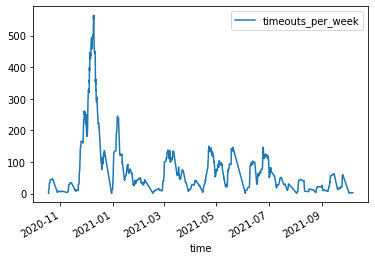

In [47]:
timeouts.plot(x = 'time',
             y = 'timeouts_per_week');

In [53]:
slurm_ce5[(slurm_ce5['user'] == '9204')&
          (slurm_ce5['command'] == 'sbatch')]

,time,user,retry,elapsed_time,return_code,command,server
136,2020-10-16 08:34:42.779719,9204,0,5.240251064300537,0,sbatch,ce5
478,2020-10-16 08:53:15.711346,9204,0,0.14244365692138672,0,sbatch,ce5
670,2020-10-16 09:04:56.472464,9204,0,0.0663447380065918,0,sbatch,ce5
826,2020-10-16 09:24:26.694758,9204,0,0.07288265228271484,0,sbatch,ce5
923,2020-10-16 09:34:24.594440,9204,0,0.07640910148620605,0,sbatch,ce5
...,...,...,...,...,...,...,...
4770675,2021-10-07 20:55:57.744376,9204,0,0.1659708023071289,0,sbatch,ce5
4770738,2021-10-07 21:15:15.040133,9204,0,0.0283200740814209,0,sbatch,ce5
4770768,2021-10-07 21:23:40.712260,9204,0,0.028397560119628906,0,sbatch,ce5
4770843,2021-10-07 21:44:59.008524,9204,0,0.029953718185424805,0,sbatch,ce5


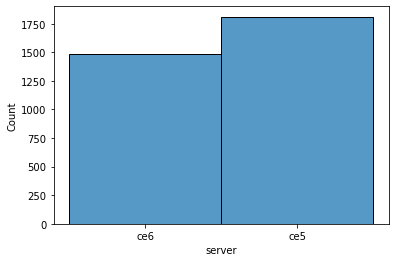

In [59]:
sns.histplot(data = timeouts,
            x = 'server');

In [ ]:
sns.boxplot(data = timeouts,
           x = )